In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re

In [57]:
data = pd.read_csv("nlp-getting-started/train.csv")
data_test = pd.read_csv("nlp-getting-started/train.csv")
norm  = pd.read_csv("nlp-getting-started/sample_submission.csv")
print(data_test.shape)
data.head(5)

(7613, 5)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
############### CREATING METAFEATURES ##################
from nltk.corpus import stopwords
from string import punctuation

stopwords = set(stopwords.words('english'))

data["mean_word_length"] = data["text"].apply(lambda x: np.mean([len(w) for w in str(x).lower().split()]))
data["tweet_length"] = data["text"].apply(lambda x: len(x))
data["word_count"] = data["text"].apply(lambda x: len(str(x).split()))
data["stopwords_count"] = data["text"].apply(lambda x: len([w for w in str(x).lower().split(' ') if w in stopwords]))
data["punctuation_count"] = data["text"].apply(lambda x: len([p for p in str(x) if p in punctuation]))
data["url_count"] = data["text"].apply(lambda x: len([w for w in str(x).lower().split()
                                                      if "http" in w or "https" in w or "www" in w or "url" in w]))
data["hashtag_count"] = data["text"].apply(lambda x: len([w for w in str(x).lower().split() if "#" in w]))
data["@_count"] = data["text"].apply(lambda x: len([w for w in str(x).lower().split() if "@" in w]))

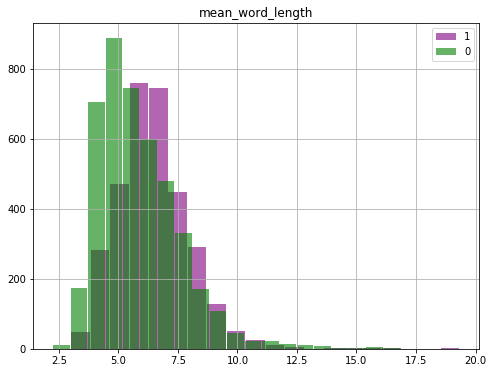

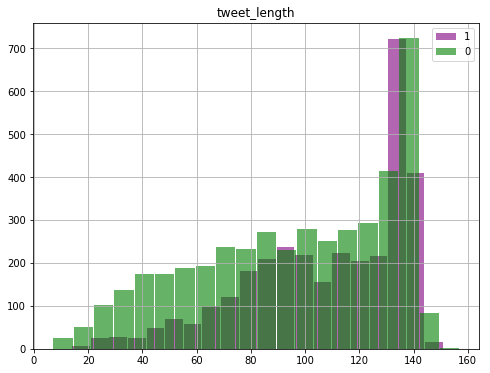

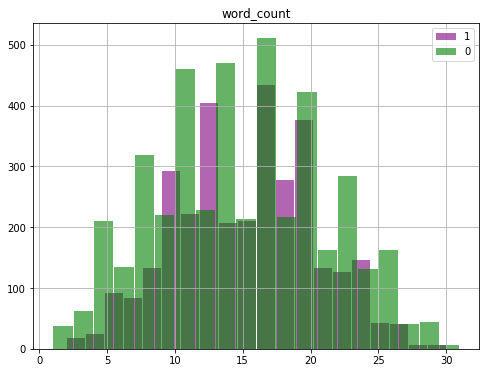

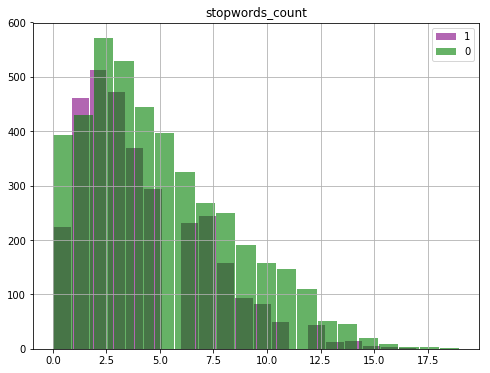

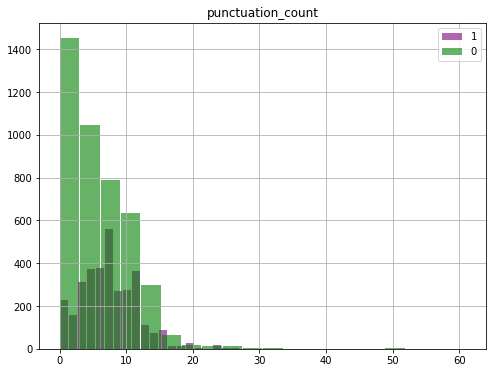

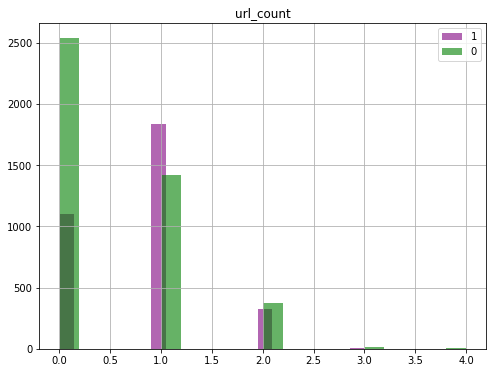

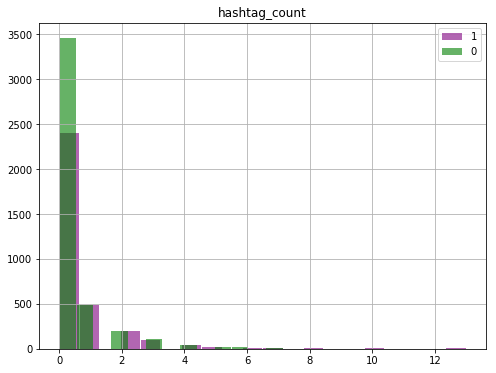

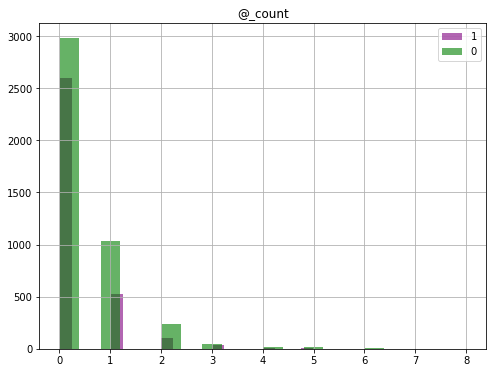

In [4]:
for column, row in data.items():
    if column not in ["id", "keyword", "location", "text", "target"]:
        plt.figure(figsize=[8,6])
        plt.title(column)
        data[column][data["target"]==1].hist(bins=20, color="purple", alpha=0.6, rwidth=0.95, label = "1")
        data[column][data["target"]==0].hist(bins=20, color="green", alpha=0.6, rwidth=0.95, label = "0")
        plt.legend()

In [5]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

stopwords = set(stopwords.words('english'))
corpus = []

# data["text"] = data["text"].str.lower()
# data["tokens"] = data["text"].apply(nltk.word_tokenize)

def clean_data(text):
    
    # special characters
    text = re.sub(r"\x89Û_", "", text)
    text = re.sub(r"\x89ÛÒ", "", text)
    text = re.sub(r"\x89ÛÓ", "", text)
    text = re.sub(r"\x89ÛÏWhen", "When", text)
    text = re.sub(r"\x89ÛÏ", "", text)
    text = re.sub(r"China\x89Ûªs", "China's", text)
    text = re.sub(r"let\x89Ûªs", "let's", text)
    text = re.sub(r"\x89Û÷", "", text)
    text = re.sub(r"\x89Ûª", "", text)
    text = re.sub(r"\x89Û\x9d", "", text)
    text = re.sub(r"å_", "", text)
    text = re.sub(r"\x89Û¢", "", text)
    text = re.sub(r"\x89Û¢åÊ", "", text)
    text = re.sub(r"fromåÊwounds", "from wounds", text)
    text = re.sub(r"åÊ", "", text)
    text = re.sub(r"åÈ", "", text)
    text = re.sub(r"JapÌ_n", "Japan", text)    
    text = re.sub(r"Ì©", "e", text)
    text = re.sub(r"å¨", "", text)
    text = re.sub(r"SuruÌ¤", "Suruc", text)
    text = re.sub(r"åÇ", "", text)
    text = re.sub(r"å£3million", "3 million", text)
    text = re.sub(r"åÀ", "", text)
    
    
            
    #remove numbers
    text = re.sub(r'[0-9]', '', text)
    
    #remove single letters
    #text = re.sub(r'[a-z]', '', text)
    
    # remove punctuation and special chars (keep '!')
    for p in punctuation:
        text = text.replace(p, '')
    
    #remove urls
    text = re.sub(r'http\S+', '', text)
    
    #tokenize
    text = nltk.word_tokenize(text)
    
    #remove stopwords
    text = [w.lower() for w in text if not w in stopwords]
    corpus.append(text)
    return text
    

In [6]:
data["tokens"] = data["text"].apply(lambda x: clean_data(x))

In [7]:
corpus
#data.head(5)

[['our', 'deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'us'],
 ['forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada'],
 ['all',
  'residents',
  'asked',
  'shelter',
  'place',
  'notified',
  'officers',
  'no',
  'evacuation',
  'shelter',
  'place',
  'orders',
  'expected'],
 ['people', 'receive', 'wildfires', 'evacuation', 'orders', 'california'],
 ['just',
  'got',
  'sent',
  'photo',
  'ruby',
  'alaska',
  'smoke',
  'wildfires',
  'pours',
  'school'],
 ['rockyfire',
  'update',
  'california',
  'hwy',
  'closed',
  'directions',
  'due',
  'lake',
  'county',
  'fire',
  'cafire',
  'wildfires'],
 ['flood',
  'disaster',
  'heavy',
  'rain',
  'causes',
  'flash',
  'flooding',
  'streets',
  'manitou',
  'colorado',
  'springs',
  'areas'],
 ['im', 'top', 'hill', 'i', 'see', 'fire', 'woods'],
 ['theres',
  'emergency',
  'evacuation',
  'happening',
  'building',
  'across',
  'street'],
 ['im', 'afraid', 'tornado', 'coming', 'area'],
 ['three', 'people

In [8]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

data["stemmed_tokens"] = data["tokens"].map(lambda y: [stemmer.stem(x) for x in y])

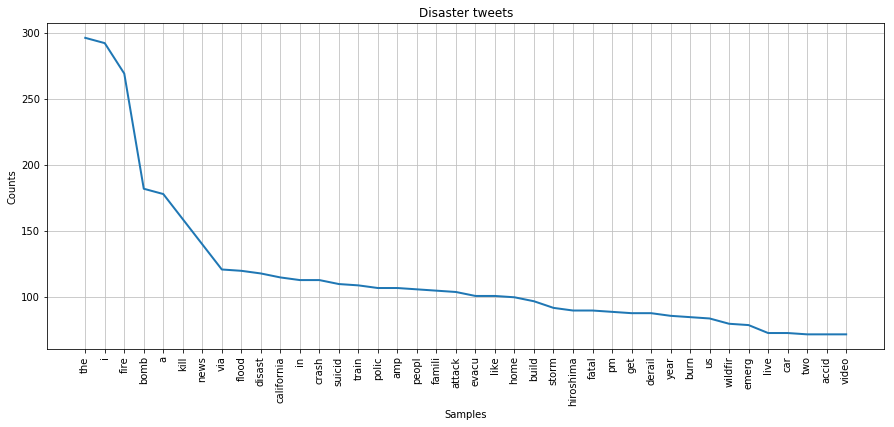

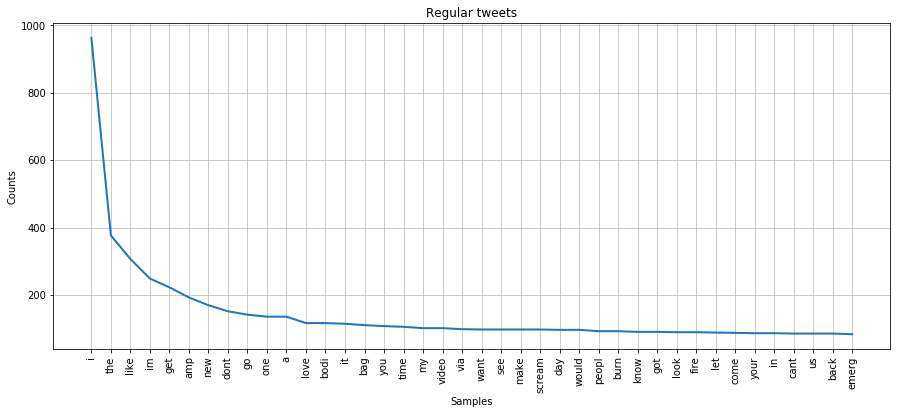

In [9]:
disaster_tweets = []
regular_tweets = []
build_vocab = []

for i, row in data.iterrows():
    if row["target"] == 1:
        disaster_tweets.append(row["stemmed_tokens"])
    else:
        regular_tweets.append(row["stemmed_tokens"])
        
disaster_tweets = [val for sublist in disaster_tweets for val in sublist]
regular_tweets = [val for sublist in regular_tweets for val in sublist]




freq_ds = nltk.FreqDist(disaster_tweets)
plt.figure(figsize=(15,6))
plt.title("Disaster tweets")
freq_ds.plot(40, cumulative=False)


freq_rg = nltk.FreqDist(regular_tweets)
plt.figure(figsize=(15,6))
plt.title("Regular tweets")
freq_rg.plot(40, cumulative=False)



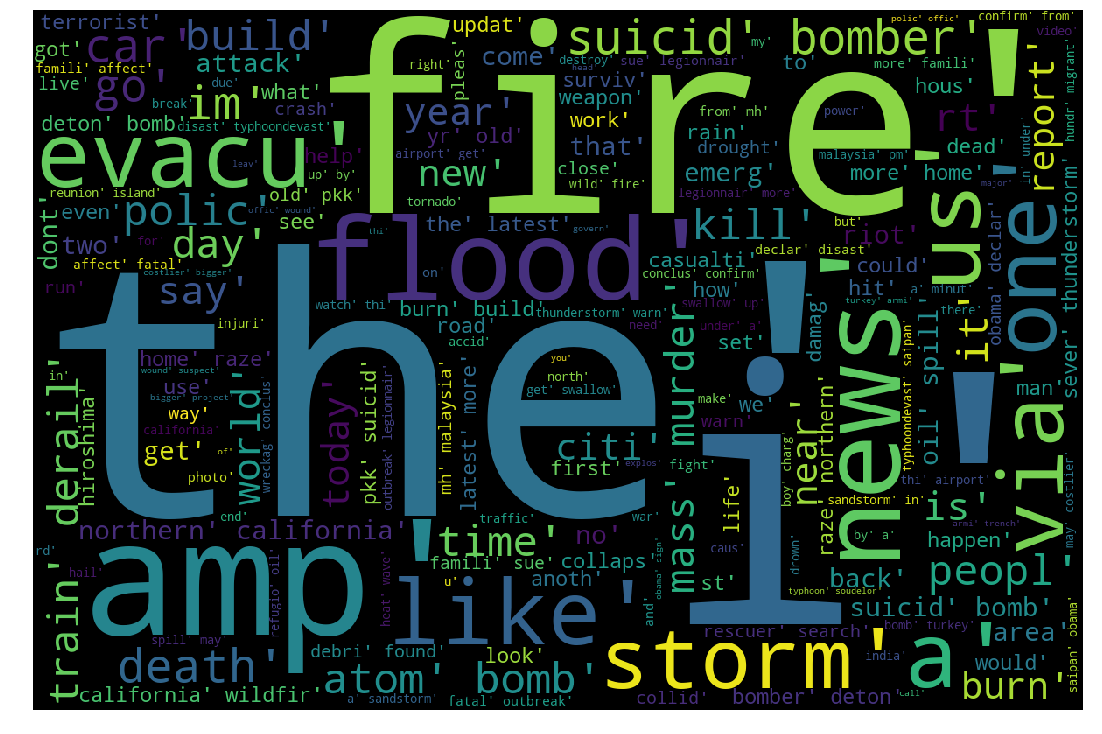

In [10]:
#print(disaster_tweets)

from wordcloud import WordCloud

wordcloud = WordCloud(width = 1200, height = 800, 
                background_color ='black',
                min_font_size = 10).generate(str(disaster_tweets)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (15, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  

# Model building

In [11]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from keras.layers.recurrent import LSTM
from keras.layers.embeddings import Embedding
from keras.models import Model, Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, Bidirectional
from keras.wrappers.scikit_learn import KerasClassifier
from keras.activations import relu
from keras.losses import categorical_crossentropy, binary_crossentropy
from keras.utils import to_categorical

from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

Using TensorFlow backend.


In [12]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data["stemmed_tokens"])
sequences = tokenizer.texts_to_sequences(data['stemmed_tokens'])


In [13]:
X = pad_sequences(sequences,maxlen=120,padding='post',truncating='post')
y = data["target"]
#y = to_categorical(data["target"], num_classes=None)

In [14]:
print(sequences[21])
print(tokenizer.word_index['king'])
print(data.iloc[1]['text'])

[961, 480]
887
Forest fire near La Ronge Sask. Canada


# Feature selection

In [15]:
# print(f"Vocab set contains of:\t{len(emb_model.wv.vocab)} words")
# print(f"Output vocab set:\t{emb_model.wv.syn0.shape[1]} words")

vocab_size=len(tokenizer.word_index)+1
#print(vocab_size)
#print(pad.shape[1])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)

In [18]:
embedding_layer = Embedding(vocab_size, 64, input_length=X.shape[1])

model = Sequential()
model.add(embedding_layer)
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam', loss=binary_crossentropy, metrics = ['accuracy'])

print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 64)           884288    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               66048     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 954,497
Trainable params: 954,497
Non-trainable params: 0
_________________________________________________________________
None


In [42]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Train on 5709 samples, validate on 1904 samples
Epoch 1/5
5709/5709 [==============================] - 40s 7ms/step - loss: 0.1115 - accuracy: 0.9620 - val_loss: 0.7147 - val_accuracy: 0.7652
Epoch 2/5
5709/5709 [==============================] - 40s 7ms/step - loss: 0.0804 - accuracy: 0.9741 - val_loss: 0.8164 - val_accuracy: 0.7532
Epoch 3/5
5709/5709 [==============================] - 34s 6ms/step - loss: 0.0625 - accuracy: 0.9793 - val_loss: 0.7863 - val_accuracy: 0.7568
Epoch 4/5
5709/5709 [==============================] - 35s 6ms/step - loss: 0.0551 - accuracy: 0.9793 - val_loss: 0.8679 - val_accuracy: 0.7663
Epoch 5/5
5709/5709 [==============================] - 47s 8ms/step - loss: 0.0441 - accuracy: 0.9828 - val_loss: 0.7491 - val_accuracy: 0.7489


In [43]:
data_test["tokens"] = data_test["text"].apply(lambda x: clean_data(x))


In [44]:
data_test["stemmed_tokens"] = data_test["tokens"].map(lambda y: [stemmer.stem(x) for x in y])

In [45]:
sequences = tokenizer.texts_to_sequences(data_test['stemmed_tokens'])
X_to_predict = pad_sequences(sequences,maxlen=120,padding='post',truncating='post')

In [46]:
X_to_predict.shape


(7613, 120)

In [47]:
y_predicted = model.predict(X_to_predict, batch_size=32)